<a href="https://colab.research.google.com/github/SRIROSSAAISYAHPUTERIBAHARIE/PSDS-5.0/blob/main/Pertemuan_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SRI ROSSA AISYAH PUTERI BAHARIE**
#**2100015052**
**PERTEMUAN 15**

#**Visualisasi Data dengan MatPlotLibt**

#**Memuat Library Matplotlib**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

#**Menyiapkan Dataset**

In [3]:
djia_data = pd.read_csv('https://raw.githubusercontent.com/SRIROSSAAISYAHPUTERIBAHARIE/DATASETT/main/%5EJKSE.csv')
djia_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-20,6736.171875,6880.756836,6736.063965,6874.743164,6874.743164,182468200
1,2022-07-21,6874.783203,6893.375977,6809.715820,6864.130859,6864.130859,156437900
2,2022-07-22,6864.130859,6901.720215,6850.488770,6886.961914,6886.961914,199589800
3,2022-07-25,6887.041992,6908.191895,6858.407227,6858.407227,6858.407227,210616100
4,2022-07-26,6858.446777,6899.929199,6857.800781,6871.537109,6871.537109,320241300


Kita menggunakan metode `rename() di pandas` karena dataset yang kita unduh memiliki spasi ekstra pada nama kolom.

In [4]:
djia_data = djia_data.rename(columns = {'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close', 'Adj Close': 'Adj Close', 'Volume': 'Volume'})

Menugurutkan data tanggal

In [5]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])
djia_data = djia_data.sort_values(by = 'Date')

#**Membuat Line Plot**

**Line Plot dengan Garis Tunggal**

Kita dapat membuat plot garis di matplotlib menggunakan `plt.plot()`metode di mana argumen pertama adalah variabel x dan argumen kedua adalah variabel y di plot garis kita. Setiap kali kami membuat plot, kami perlu memastikan untuk menelepon `plt.show()`untuk memastikan kami melihat grafik yang telah kami buat. Kami akan memvisualisasikan harga penutupan DJIA dari waktu ke waktu.

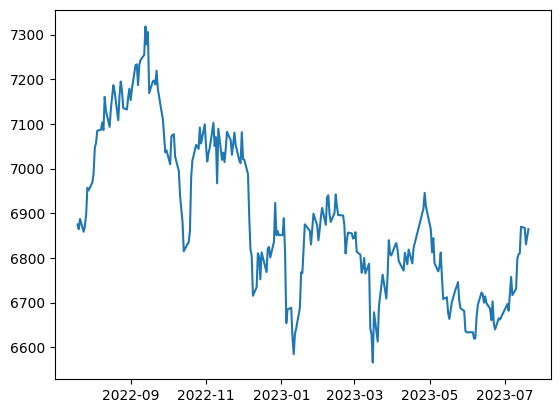

In [6]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()


**Line Plot dengan Lebih dari satu garis**

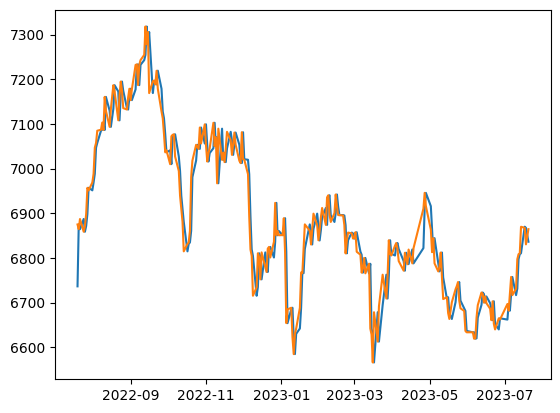

In [7]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.plot(djia_data['Date'], djia_data['Close'])


plt.show()

#**Menambahkan Legend**

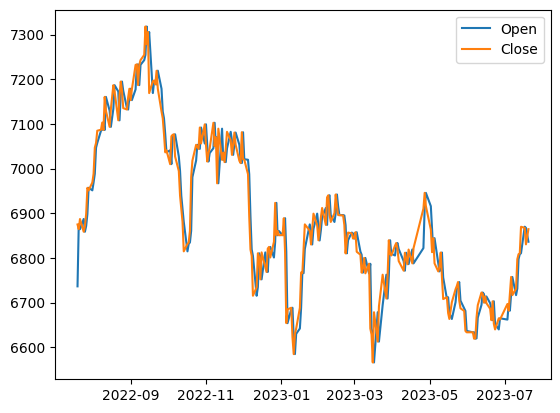

In [8]:
plt.plot(djia_data['Date'], djia_data['Open'], label = 'Open')
plt.plot(djia_data['Date'], djia_data['Close'], label = 'Close')
plt.legend()
plt.show()

#**Mengubah Warna**

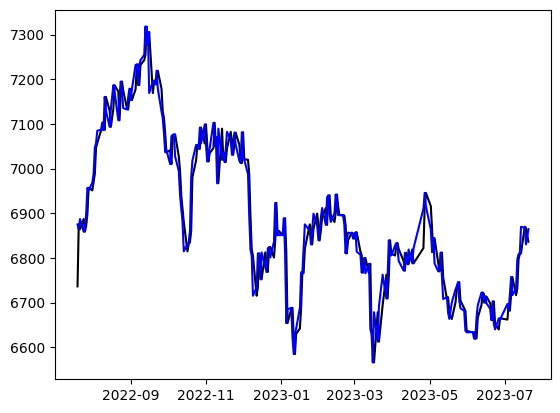

In [9]:
plt.plot(djia_data['Date'], djia_data['Open'], color = 'black')
plt.plot(djia_data['Date'], djia_data['Close'], color = 'blue')
plt.show()

#**Membuat Bar Plot**

In [10]:
# Import the calendar package
from calendar import month_name

# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
djia_monthly_mean = djia_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

djia_monthly_mean.head(6)

<ipython-input-10-0d9409be0a9c>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean() \


,Month,Open,High,Low,Close,Adj Close,Volume
0,January,6769.151809,6805.543736,6726.330125,6768.608957,6768.608957,1.574624e+08
1,February,6885.267578,6913.875684,6855.997925,6885.575903,6885.575903,1.621636e+08
2,March,6750.545201,6789.430897,6716.188523,6748.636393,6748.636393,1.538325e+08
3,April,6823.533447,6858.473214,6795.374547,6831.371931,6831.371931,1.362486e+08
4,May,6748.695568,6770.254209,6702.203962,6735.191941,6735.191941,1.816131e+08
5,June,6672.065717,6696.612621,6640.649759,6673.740866,6673.740866,1.579971e+08


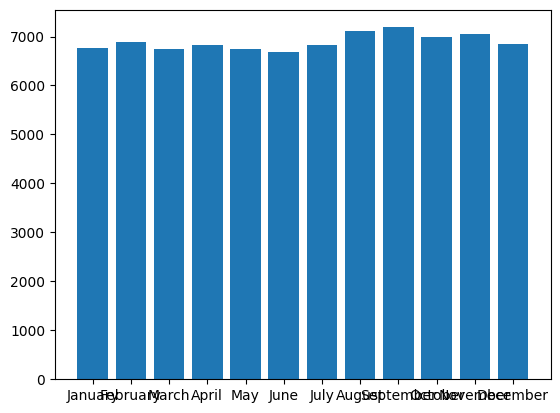

In [11]:
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
plt.show()

#**Menyusun Ulang Bar di Bar Plots**


Jika kita ingin menampilkan bar ini dalam urutan dari harga penutupan rata-rata Bulanan tertinggi ke terendah, kita dapat mengurutkan bar menggunakan metode `sort_values()` dan kemudian menggunakan metode `plt.bar()` yang sama

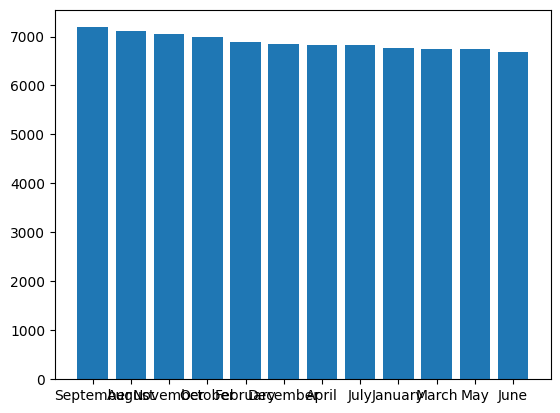

In [12]:
djia_monthly_mean_srtd = djia_monthly_mean.sort_values(by = 'Close', ascending = False)

plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'])
plt.show()

#**Membuat Scater Plot**

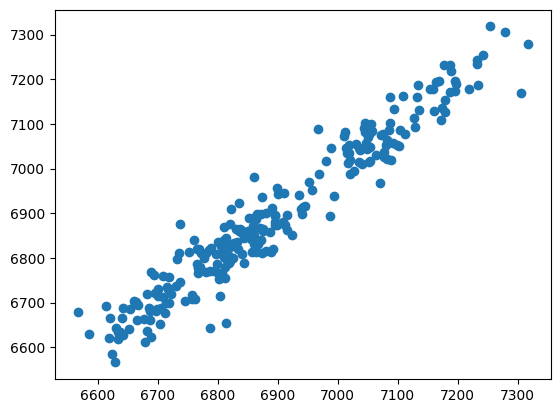

In [13]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

#**Plot Sebar dengan Garis Tren**


Selanjutnya, kita akan menambahkan garis tren ke grafik untuk menunjukkan hubungan linear antara variabel Open dan Close secara lebih eksplisit. Untuk melakukan ini, kita akan menggunakan metode `numpy polyfit()` dan `poly1d()`.

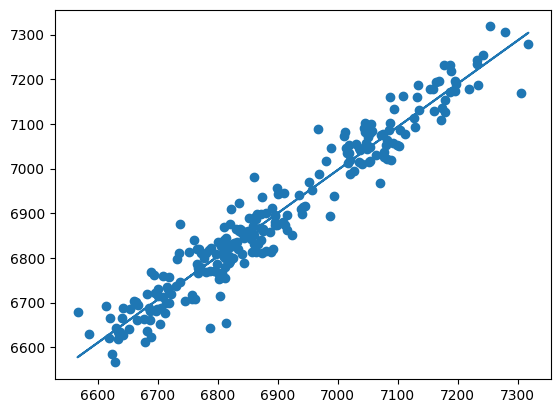

In [14]:
z = np.polyfit(djia_data['Open'], djia_data['Close'], 1)
p = np.poly1d(z)


plt.scatter(djia_data['Open'], djia_data['Close'])
plt.plot(djia_data['Open'], p(djia_data['Open']))
plt.show()

#**Menambahkan Judul**

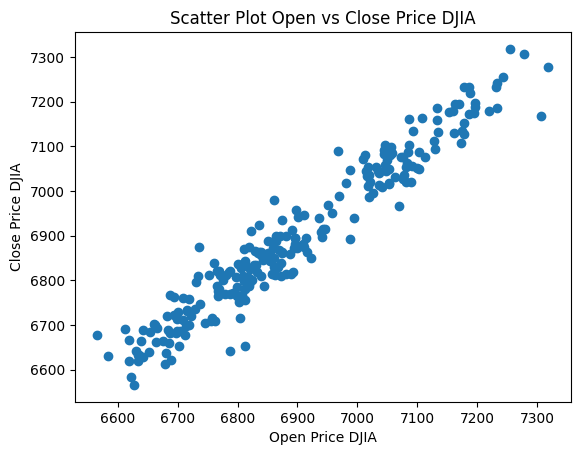

In [15]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.title('Scatter Plot Open vs Close Price DJIA')
plt.ylabel('Close Price DJIA')
plt.xlabel('Open Price DJIA')
plt.show()

#**Mengubah Warna**

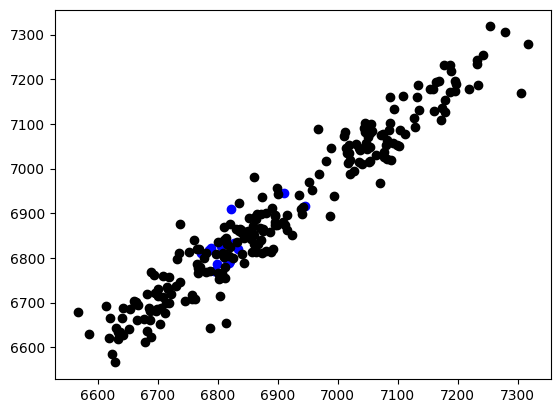

In [16]:
plt.scatter(djia_data[djia_data['Month'] == 'April']['Open'], djia_data[djia_data['Month'] == 'April']['Close'], color = 'blue')

plt.scatter(djia_data[djia_data['Month'] != 'April']['Open'], djia_data[djia_data['Month'] != 'April']['Close'], color = 'black')

plt.show()

#**Menggunakan Colormaps**

Colormaps adalah warna Matplotlib bawaan yang diskalakan berdasarkan besarnya nilai.
Kita lihat pada contoh di bawah   ketika nilainya meningkat, warna yang terkait menjadi lebih cerah dan lebih kuning sedangkan ujung bawah nilainya menjadi ungu dan lebih gelap.

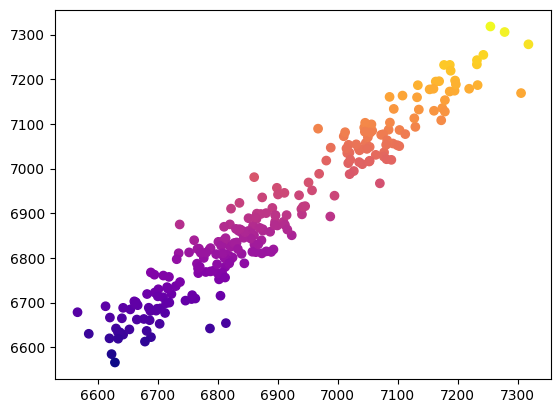

In [17]:
plt.scatter(djia_data['Open'], djia_data['Close'], c=djia_data['Close'], cmap = plt.cm.plasma)

plt.show()